In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img = cv2.imread("./images/lena_noise_512.png", 0)

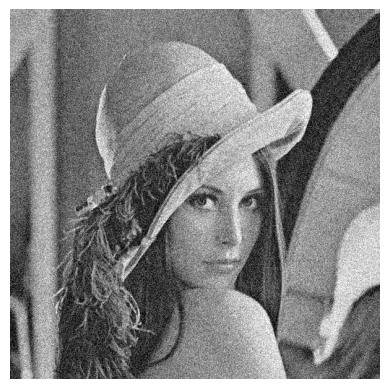

In [4]:
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
mask = np.ones([3, 3], dtype = 'float16') 
mask = mask/9
print(mask)

[[0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]]


In [7]:
f = img.copy().astype(np.float16)

In [11]:
out = np.zeros_like(img, dtype = 'float16')

In [8]:
(m,n) = img.shape
print(m,n)

512 512


In [12]:
for i in range(1,m-1):
    for j in range(1,n-1):
        tmp = 0
        for p in range(3):
            for q in range(3):
                tmp = tmp + (mask[p,q]*f[i+p-1,j+q-1])
        out[i,j] = tmp    

In [13]:
out = out.astype(np.uint8)

In [14]:
imgs = cv2.hconcat([img, out])

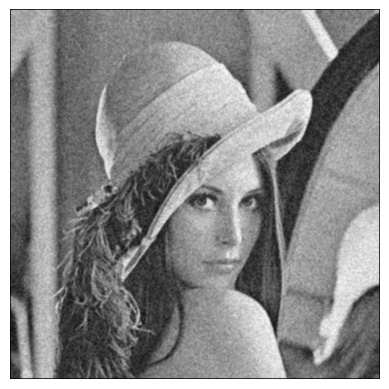

In [16]:
plt.axis("off")
plt.imshow(out, cmap='gray')
plt.show()